<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network-Model" data-toc-modified-id="Convolutional-Neural-Network-Model-1">Convolutional Neural Network Model</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1">Import libraries</a></span></li><li><span><a href="#Getting-around-with-the-Training-Dataset" data-toc-modified-id="Getting-around-with-the-Training-Dataset-1.2">Getting around with the Training Dataset</a></span><ul class="toc-item"><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-1.2.1">Import the data</a></span></li></ul></li></ul></li><li><span><a href="#Splitting-the-data-into-training-set-and-validation-set" data-toc-modified-id="Splitting-the-data-into-training-set-and-validation-set-2">Splitting the data into training set and validation set</a></span></li><li><span><a href="#1st-CNN-Layer" data-toc-modified-id="1st-CNN-Layer-3">1st CNN Layer</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Compiling-this-layer" data-toc-modified-id="Compiling-this-layer-3.0.1">Compiling this layer</a></span></li></ul></li><li><span><a href="#Predicting-the-result" data-toc-modified-id="Predicting-the-result-3.1">Predicting the result</a></span></li></ul></li><li><span><a href="#Testing-using-the-learned-model" data-toc-modified-id="Testing-using-the-learned-model-4">Testing using the learned model</a></span></li></ul></div>

# Convolutional Neural Network Model


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Getting around with the Training Dataset

### Import the data

In [2]:
train = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Minor Project/data/train.csv")

train.shape

(42000, 785)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data into training set and validation set

In [4]:
X_train_all = (train.iloc[:, 1:].values).astype('float32') / 255 #all pixel values converted to feature matrix of 0 and 1

y_train_all = train.iloc[:, 0].values.astype('int32') #labels only.. target digits.


In [5]:
y_train_all

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [6]:
y_train_all = to_categorical(y_train_all) 

# scaled our dataset

In [7]:
y_train_all

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size = 0.10, random_state = 42)

* CNN of keras only accepts images of 3 dimension 
* We will convert our image into 28x28 matrix
* We will add one more dimension for the color channel

In [9]:
X_train_image = np.reshape(X_train,(X_train.shape[0], 28, 28, 1))
X_test_image = np.reshape(X_test,(X_test.shape[0], 28, 28, 1))

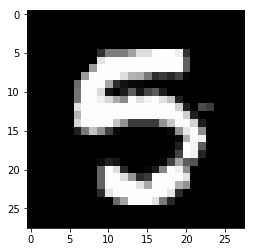

In [10]:
plt.imshow(X_train_image[1,:,:,0], cmap = "gray")
plt.show()

# 1st CNN Layer

1. **Input Layer**
> size of input image is `28x28`. `input_shape = (28,28,1)`, where 1 is the number of color channels

2. **Convolution Layer**

    * We are using `32` filters of size `3 x 3`
    
    * `stride(2,2)` means it will skip one pixel (both vertically and horizontally) while applying convolution.

    * There are $32 * 3 * 3 + 32 = 320$ parameters

    * Using `relu` as activation function, then `maxPooling` by 2. So the output of this CNN layer will be `32 of 6x6`       images
    
    
3. **Flatten Layer**
    one has to flatten the output of the CNN layer before applying it to `softmax` layer.
    
    * $6 * 6 * 32 = 1152$


4. **Softmax Layer**
    * At the ouput layer i.e. our last layer would require 
        $1152 * 10  + 10 = 11530$ parameters

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 activation = "relu",
                 input_shape = (28,28,1),
                 strides = (2,2)
                ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten(name  = "flatten"))
model.add(Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                11530     
Total params: 11,850
Trainable params: 11,850
Non-trainable params: 0
_________________________________________________________________


### Compiling this layer

In [12]:
model.compile(loss = "categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"]
             )

## Predicting the result

In [13]:
batch_size = 64
nb_epochs = 25

model_fitting = model.fit(X_train_image, y_train,
                          batch_size= batch_size,
                          epochs= nb_epochs,
                          verbose=2,
                          validation_data=(X_test_image, y_test),
                          initial_epoch= 0
                         )

ValueError: Error when checking target: expected dense_1 to have shape (100,) but got array with shape (10,)

# Testing using the learned model

In [28]:
test = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Minor Project/data/test.csv")

In [29]:
X_testing = (test.values).astype("float32")/255

X_testing_image = np.reshape(X_testing, (X_testing.shape[0], 28, 28, 1))

In [30]:
pred_class = model.predict_classes(X_testing_image, verbose=0)

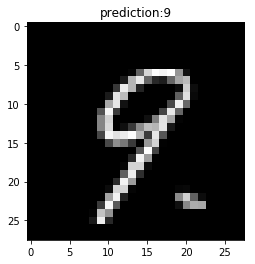

In [34]:
i=2
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

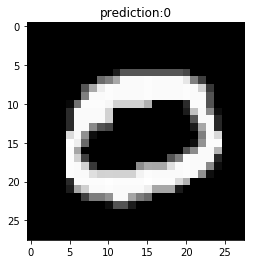

In [35]:
i=1
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

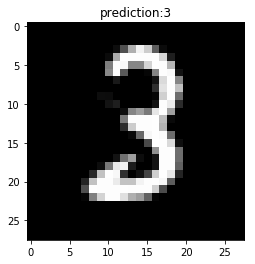

In [37]:
i=4
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

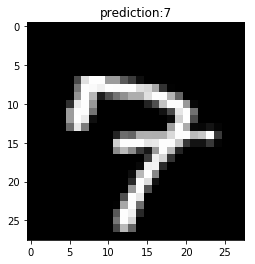

In [38]:
i=5
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

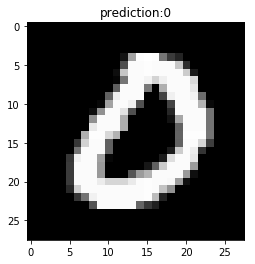

In [39]:
i=6
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

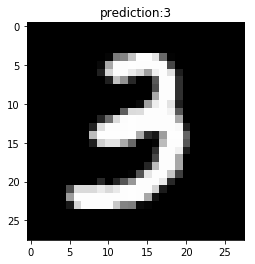

In [40]:
i=7
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

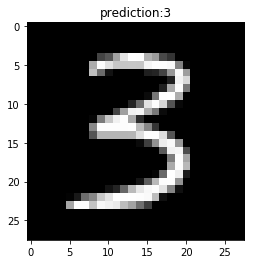

In [42]:
i=9
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

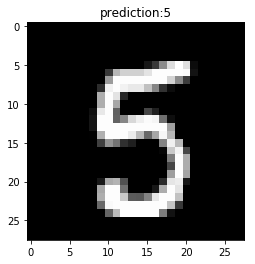

In [43]:
i=10
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

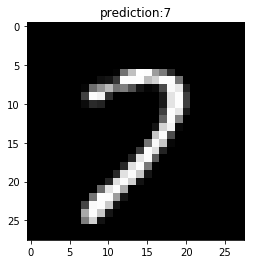

In [44]:
i=11
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

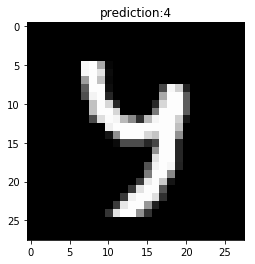

In [45]:
i=12
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()

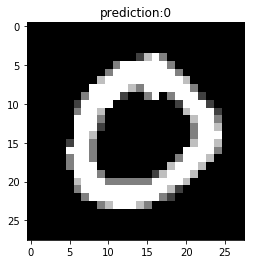

In [46]:
i=13
plt.imshow(X_testing_image[i,:,:,0],cmap='gray')

plt.title('prediction:%d'%pred_class[i])

plt.show()